### Part 1: Minimum-Tracking-Error Frontier

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
industry_portfolio = pd.read_csv('Industry_Portfolios.csv',index_col=0)
industry_portfolio

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
Date,,,,,,,,,,
200401,0.06,-1.07,-0.62,0.44,4.53,1.41,0.45,3.09,1.92,2.88
200402,4.25,-0.07,1.95,4.69,-2.92,-0.52,6.09,0.89,2.07,2.16
200403,-0.09,-1.15,-0.27,-0.13,-2.55,-2.07,0.29,-3.96,1.13,-0.63
200404,1.42,2.30,-0.17,2.52,-4.91,-0.48,-2.70,3.54,-3.55,-3.76
200405,-1.89,-1.64,1.61,0.39,4.85,-2.95,0.30,-0.42,1.28,1.86
...,...,...,...,...,...,...,...,...,...,...
201308,-4.00,-1.00,-1.95,-1.83,-0.12,-3.28,-4.21,-3.49,-4.43,-3.66
201309,1.94,6.46,5.20,2.03,3.77,4.33,4.46,4.19,1.05,3.83
201310,4.75,0.72,4.56,4.86,3.80,5.52,5.08,3.47,3.35,3.87


In [3]:
market_portfolio = pd.read_excel('Market_Portfolio.xlsx',index_col=0)
market_portfolio

,Market
Date,
200401,2.22
200402,1.46
200403,-1.23
200404,-1.75
200405,1.23
...,...
201308,-2.69
201309,3.76
201310,4.17


In [4]:
mean_df = pd.DataFrame(index=industry_portfolio.columns, columns=['Mean_Returns'])
i=0
for col in industry_portfolio.columns:
    mean_df['Mean_Returns'][i] = \
        (industry_portfolio[col] - market_portfolio['Market']).mean()
    i+=1

mean_df

,Mean_Returns
NoDur,0.15475
Durbl,-0.01475
Manuf,0.26475
Enrgy,0.483083
HiTec,0.018167
Telcm,0.133333
Shops,0.16825
Hlth,0.03575
Utils,0.159083
Other,-0.259


In [5]:
for col in industry_portfolio.columns:
    industry_portfolio[col] = industry_portfolio[col] - market_portfolio['Market']

In [6]:
V = industry_portfolio.cov()

In [7]:
R = mean_df['Mean_Returns'].values

In [8]:
R = R.reshape(10,1)

In [9]:
V

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
NoDur,5.439696,-6.073035,-1.396192,-1.200533,-1.883151,1.538885,1.140741,3.815137,4.272002,-1.768738
Durbl,-6.073035,26.628901,4.908024,-3.481055,1.891577,-1.707625,-0.354335,-8.082946,-9.617490,4.385865
Manuf,-1.396192,4.908024,2.950499,1.666133,0.065267,-0.626416,-1.154597,-2.288900,-1.901412,0.358904
Enrgy,-1.200533,-3.481055,1.666133,19.274911,-1.516972,-1.040525,-3.710439,-2.485796,4.454368,-3.864826
HiTec,-1.883151,1.891577,0.065267,-1.516972,5.098746,-0.773294,-0.245350,-1.936284,-2.342839,-1.404050
Telcm,1.538885,-1.707625,-0.626416,-1.040525,-0.773294,4.682567,0.463797,0.693157,2.721477,-1.271778
Shops,1.140741,-0.354335,-1.154597,-3.710439,-0.245350,0.463797,4.452628,0.764510,-0.176666,-0.256987
Hlth,3.815137,-8.082946,-2.288900,-2.485796,-1.936284,0.693157,0.764510,7.820446,3.496136,-1.726842
Utils,4.272002,-9.617490,-1.901412,4.454368,-2.342839,2.721477,-0.176666,3.496136,12.267476,-4.055112
Other,-1.768738,4.385865,0.358904,-3.864826,-1.404050,-1.271778,-0.256987,-1.726842,-4.055112,4.503204


> Portfolio weights are given by the equation w* = a + bRp, Where:

 $$ 
 a = \frac{\zeta  V^{-1}e- \alpha  V^{-1}R}{\zeta  \delta - \alpha^{2}}       
 $$
 
 
 $$
 b = \frac{\delta V^{-1}R-\alpha V^{-1}e}{\zeta\delta-\alpha^{2}}
 $$

>Here α is scalar, while ζ and δ are strictly positive scalars:


$$
\alpha = R`V^{-1}e
$$


$$
\zeta = R`V^{-1}R
$$


$$
\delta = e`V^{-1}e
$$

In [10]:
alpha = (R.T @ np.linalg.inv(V) @ np.ones((10,1)))[0,0]
alpha

2.9321278826306325

In [11]:
zeta = (R.T @ np.linalg.inv(V) @ R)[0,0]
zeta

0.20474497351130078

In [12]:
delta = np.ones(10).T @ np.linalg.inv(V) @ np.ones(10)
delta

58.55025437639917


> Variance of return for frontier portfolio:


$$ \sigma^{2} = \frac{1}{\delta} + \frac{\delta}{\zeta\delta - \alpha^{2}}(Rp - Rmv)^{2} $$


$$ Where: Rmv = \frac{\alpha}{\delta} $$

In [13]:
Rmv = \
    (alpha/delta)
Rmv

0.05007882397540077

> This graph must cover the range from 0% to 0.1% on the vertical axis, in increments of 0.005% (or less).

In [14]:
Rp = np.linspace(0,0.1,21)
Rp

array([0.   , 0.005, 0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035, 0.04 ,
       0.045, 0.05 , 0.055, 0.06 , 0.065, 0.07 , 0.075, 0.08 , 0.085,
       0.09 , 0.095, 0.1  ])

In [15]:
Var_withRisky = []

for r in Rp:
    Var_withRisky.append((1/delta) + (delta/(zeta*delta - alpha**2))*(r - Rmv)**2)

In [16]:
portfolio_sd = np.sqrt(Var_withRisky)
portfolio_sd

array([0.24573951, 0.22841092, 0.21170414, 0.19577839, 0.18084016,
       0.16715441, 0.15505313, 0.14493377, 0.13723545, 0.13238122,
       0.13068838, 0.13227836, 0.13703694, 0.14465174, 0.15470158,
       0.16674674, 0.18038797, 0.19529109, 0.21118913, 0.22787394,
       0.24518496])

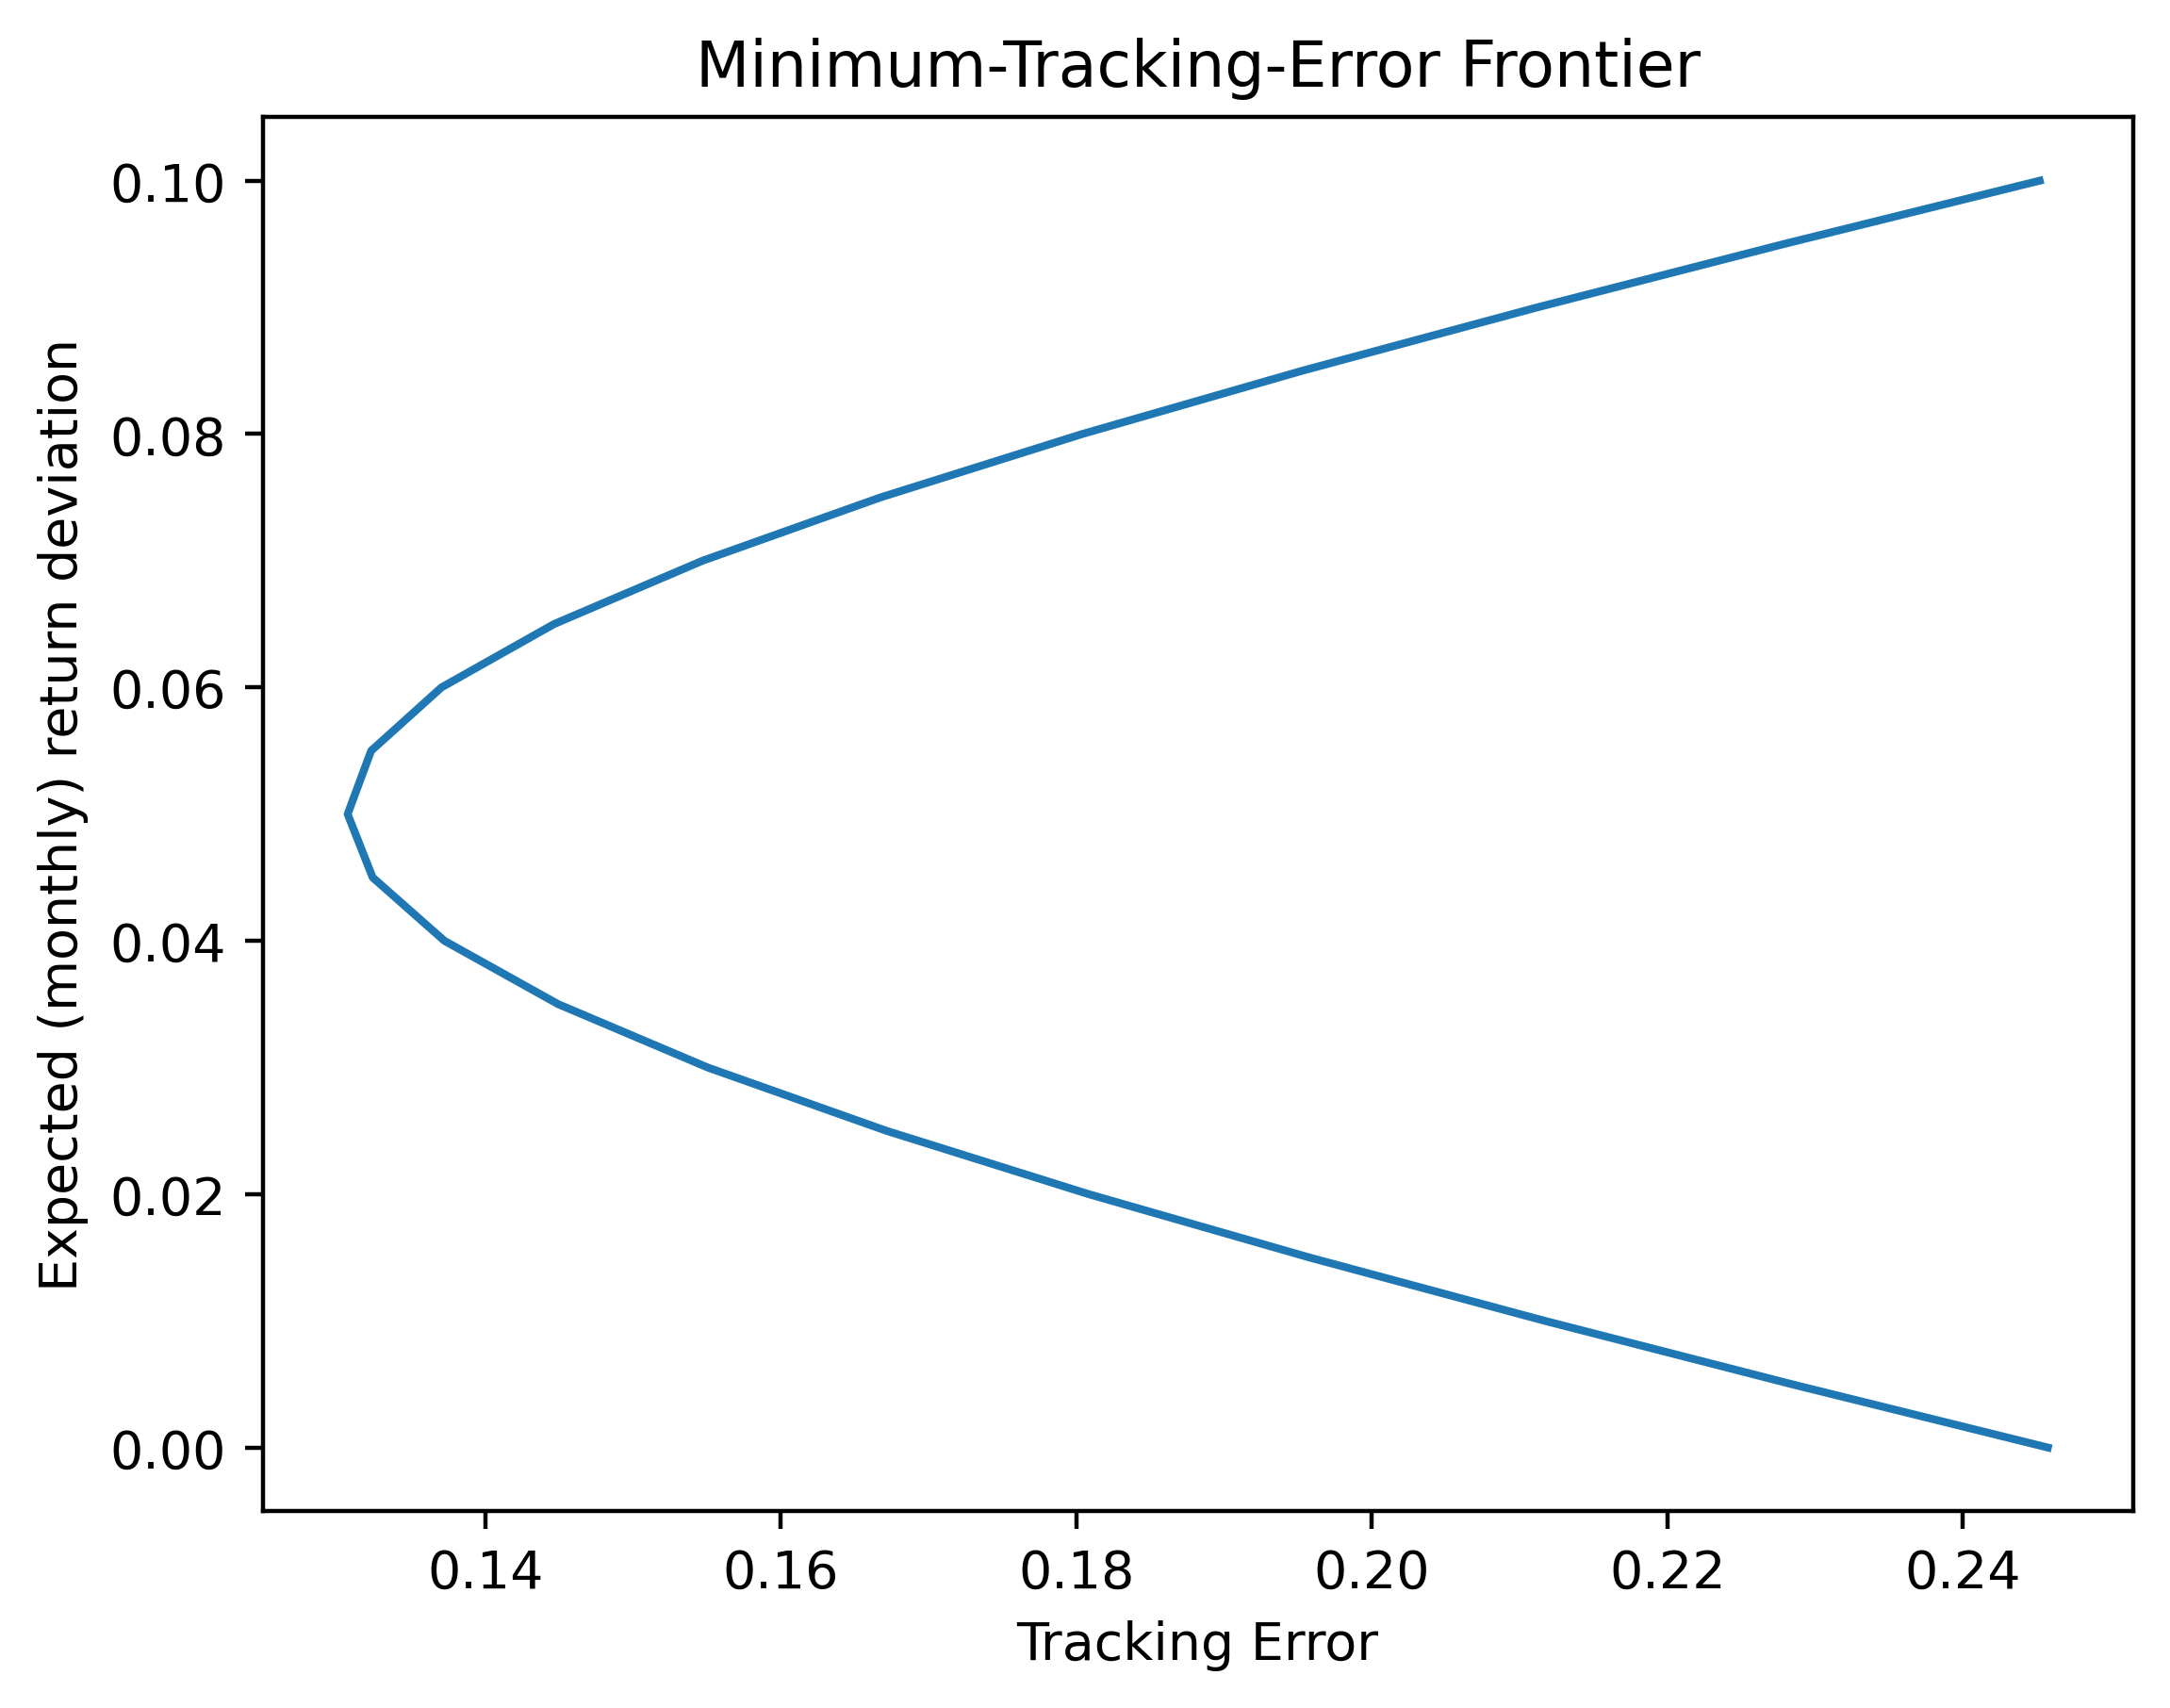

In [17]:
plt.figure(dpi=400)
plt.plot(portfolio_sd,Rp)

plt.xlabel('Tracking Error')
plt.ylabel('Expected (monthly) return deviation')
plt.title('Minimum-Tracking-Error Frontier')

plt.show()

> Also plot the line starting from the origin that is tangent to the upper half of the minimum-tracking-error frontier. Consider Rf to be zero

In [18]:
portfolio_sdWithRiskFree = np.linspace(0,0.25,21)

In [19]:
Portfolio_Return = []
Rf = 0
for sigmap in portfolio_sdWithRiskFree:
    Portfolio_Return.append(Rf + ((zeta - 2*alpha*Rf + delta*Rf**2)**0.5)*sigmap)

> Return of the tanget portfolio is given by the following formula:


$$ R_tg = Rmv - \frac{\zeta \delta - \alpha^{2}}{\delta^{2} (Rf - Rmv)} $$


$$ Where,    Rmv = \frac{\alpha}{\delta} $$

In [20]:
TangetR = Rmv - ((zeta*delta - alpha**2) / (delta**2 * (Rf - Rmv)))

In [21]:
TangetR

0.06982811859065596

In [22]:
TangentSTD = np.sqrt(((1/delta) + (delta/(zeta*delta - alpha**2))*(TangetR - Rmv)**2))

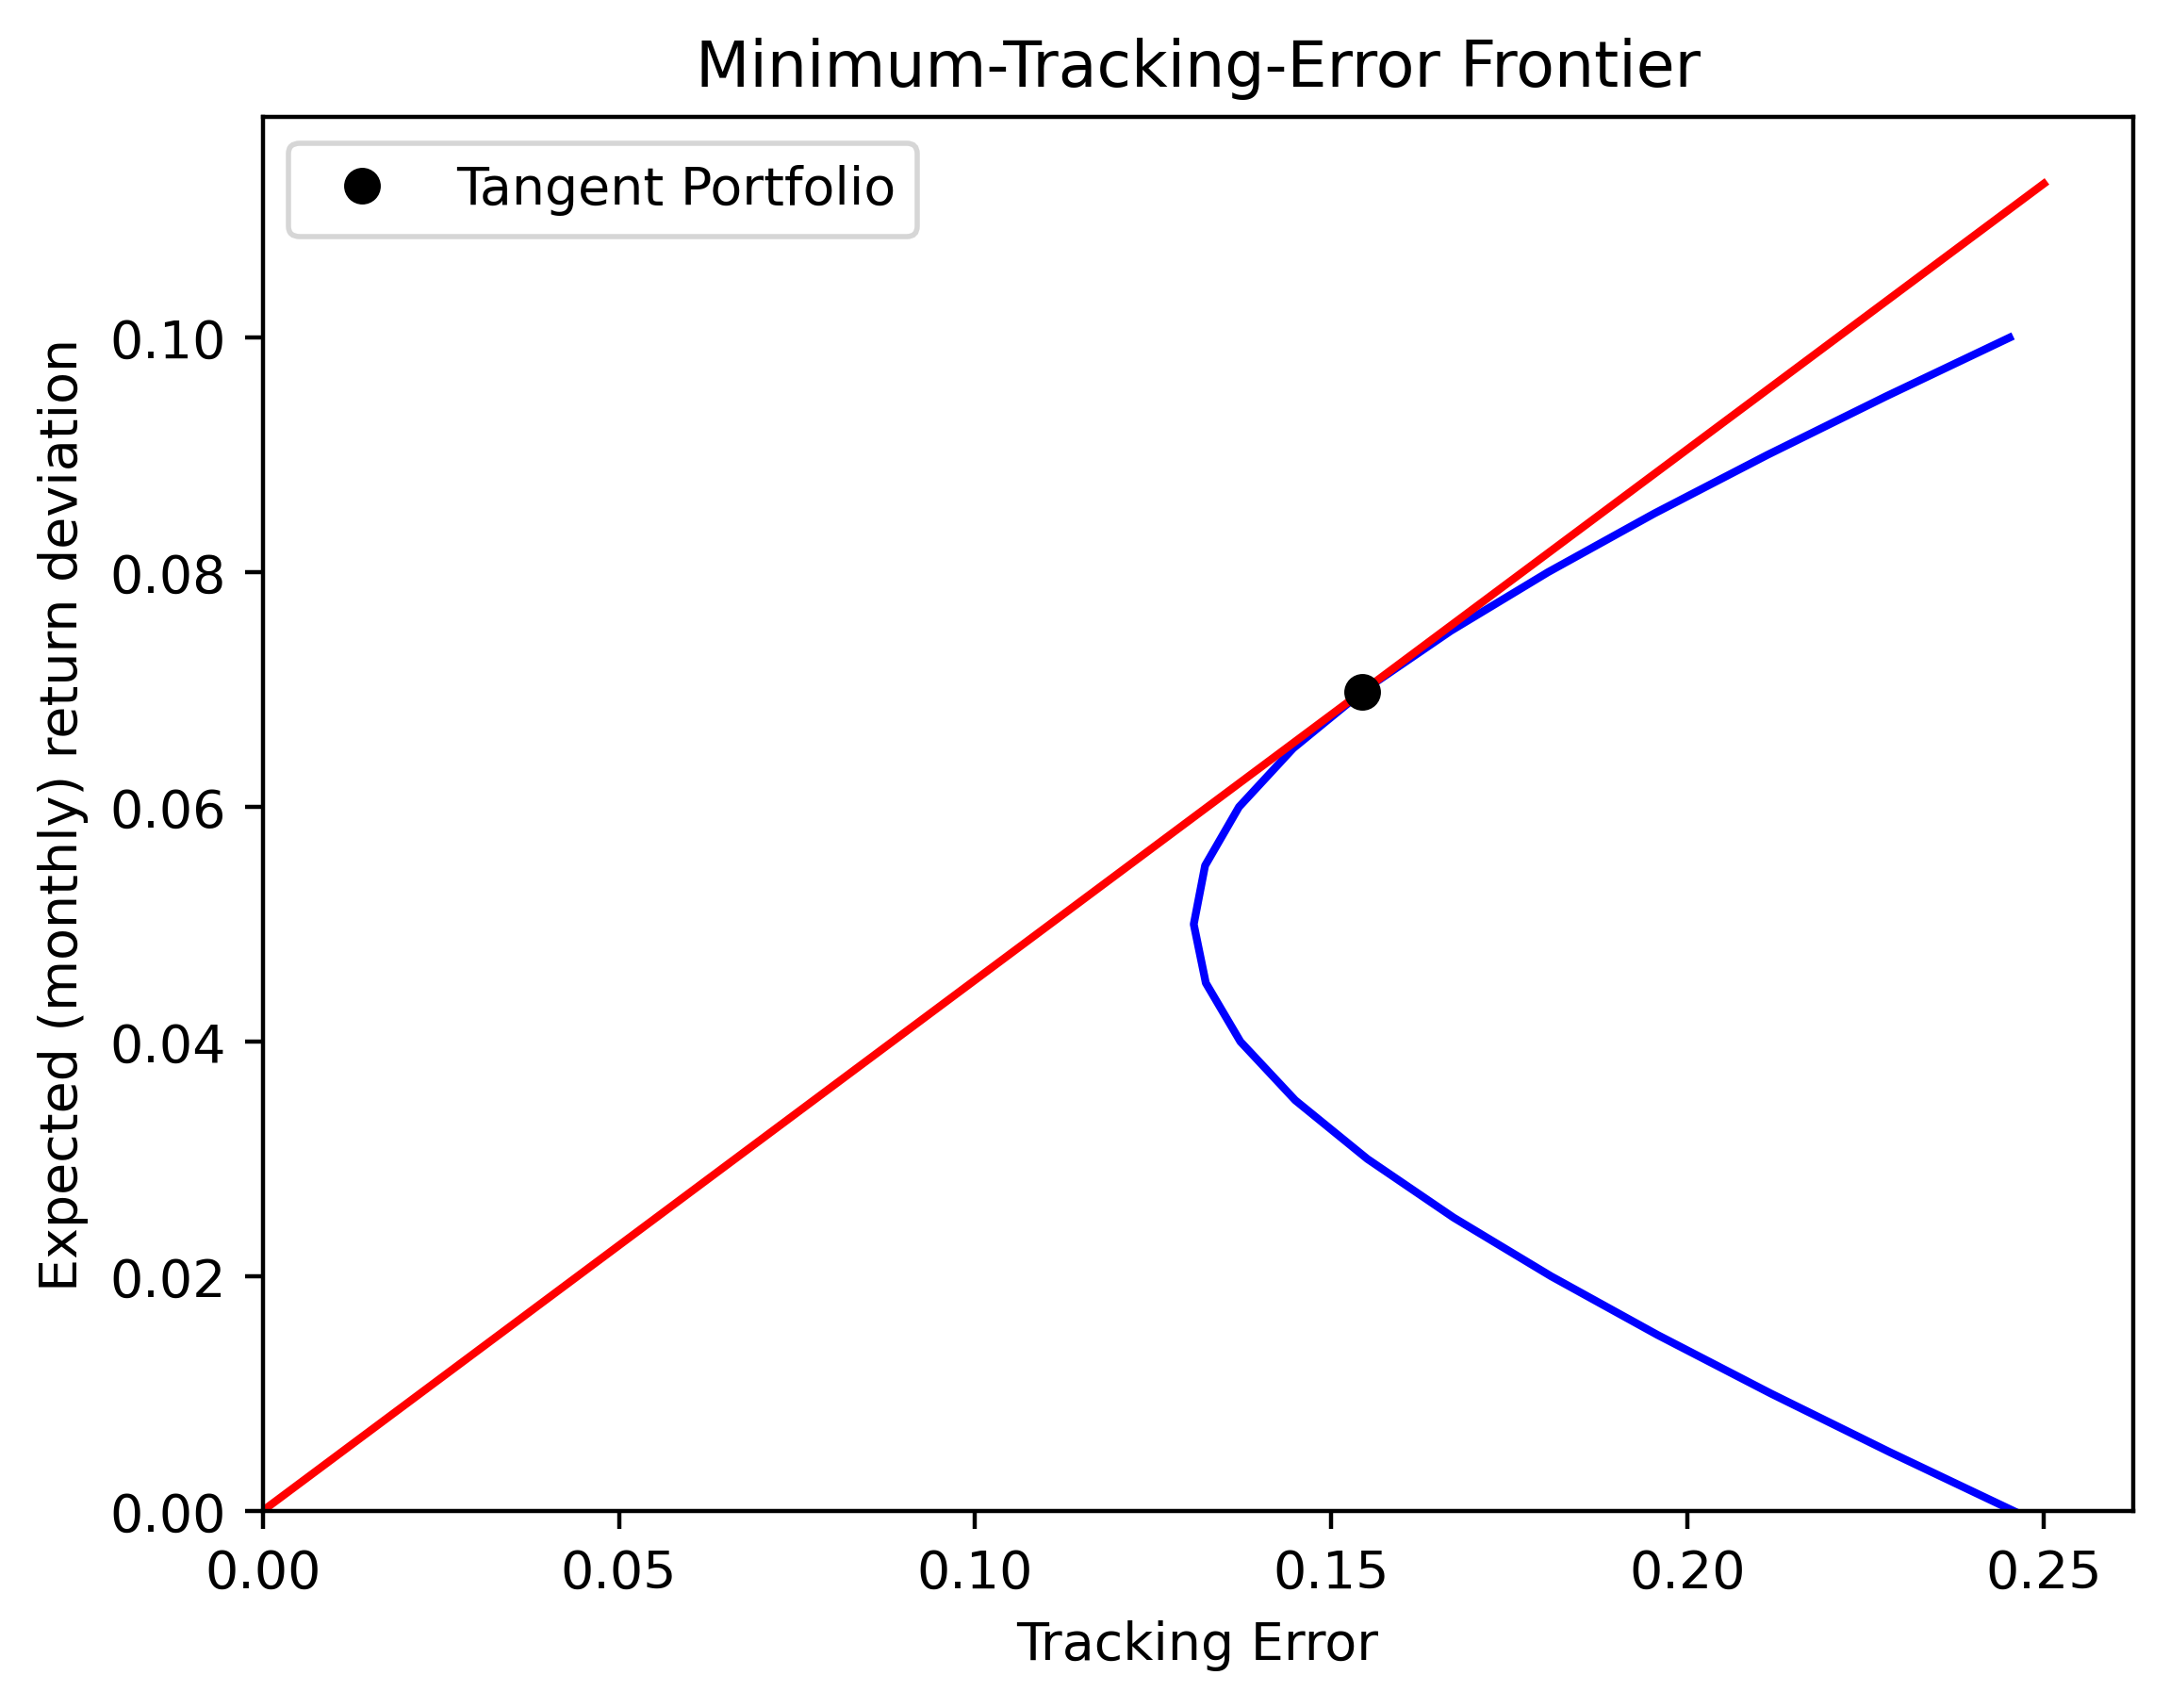

In [88]:
plt.figure(dpi=400)
plt.plot(portfolio_sd,Rp,color='blue')
plt.plot(portfolio_sdWithRiskFree,Portfolio_Return,color='red')
plt.plot(TangentSTD,TangetR,'o',color='black',label='Tangent Portfolio')

plt.xlabel('Tracking Error')
plt.ylabel('Expected (monthly) return deviation')
plt.title('Minimum-Tracking-Error Frontier')
plt.xlim(left = 0)
plt.ylim(bottom=0)

plt.legend()
plt.show()

> Calculate the tangency portfolio weights for the ten industry portfolios. Tangency Portfolio will be a portfolio with all the Risky assets hence we can use the following equation to calculate weights.


> w* = a + bRp, Where:

 $$ 
 a = \frac{\zeta  V^{-1}e- \alpha  V^{-1}R}{\zeta  \delta - \alpha^{2}}       
 $$
 
 
 $$
 b = \frac{\delta V^{-1}R-\alpha V^{-1}e}{\zeta\delta-\alpha^{2}}
 $$

In [24]:
a = \
    ((zeta * np.linalg.inv(V) @ np.ones((10,1))) - (alpha * np.linalg.inv(V) @ R)) \
    / (zeta * delta - alpha**2)

In [25]:
b = \
    ((delta * np.linalg.inv(V) @ R) - (alpha * np.linalg.inv(V) @ np.ones((10,1)))) \
    / (zeta * delta - alpha**2)

In [26]:
w = a + (b*TangetR)

In [27]:
weightsDF = pd.DataFrame({'Industry': industry_portfolio.columns,
                         'Weights':w.reshape(10,)},index=np.arange(1,11))

In [28]:
weightsDF.set_index('Industry',inplace=True)

In [98]:
weightsDF

,Weights
Industry,
NoDur,0.052634
Durbl,0.000153
Manuf,0.137627
Enrgy,0.087032
HiTec,0.179353
Telcm,0.071074
Shops,0.106884
Hlth,0.102776
Utils,0.040162


> Informatio ratio is given by


$$ IF = \frac{mean(Ri - Rm)}{std(Ri - Rm)} $$


> Where Ri is Industry Return and Rm is market Return

In [30]:
Information_Ratio = TangetR/TangentSTD

In [99]:
round(Information_Ratio,4)

0.4525

### Part 2: Minimum-Variance Frontier w/o Short Sales

> Use the monthly returns of the ten industry portfolios to generate the minimum-variance frontier without short sales, using Monte Carlo simulation. Portfolio weights will be limited to the range [0, 1].

In [48]:
import seaborn as sns

In [79]:
rng = np.random.default_rng(20230929)
mean_return1 = []
std_return1 = []
sharpe_ratio1 = []
for _ in range(100000):
    W = rng.uniform(low=0,high=1,size=10)
    Weights = (W/W.sum()).reshape(10,1)
    mean_return1.append((Weights.T @ R)[0,0])
    std_return1.append(np.sqrt(Weights.T @ V @ Weights)[0][0])

In [81]:
sharpe_ratio1 = np.divide(mean_return1,std_return1)

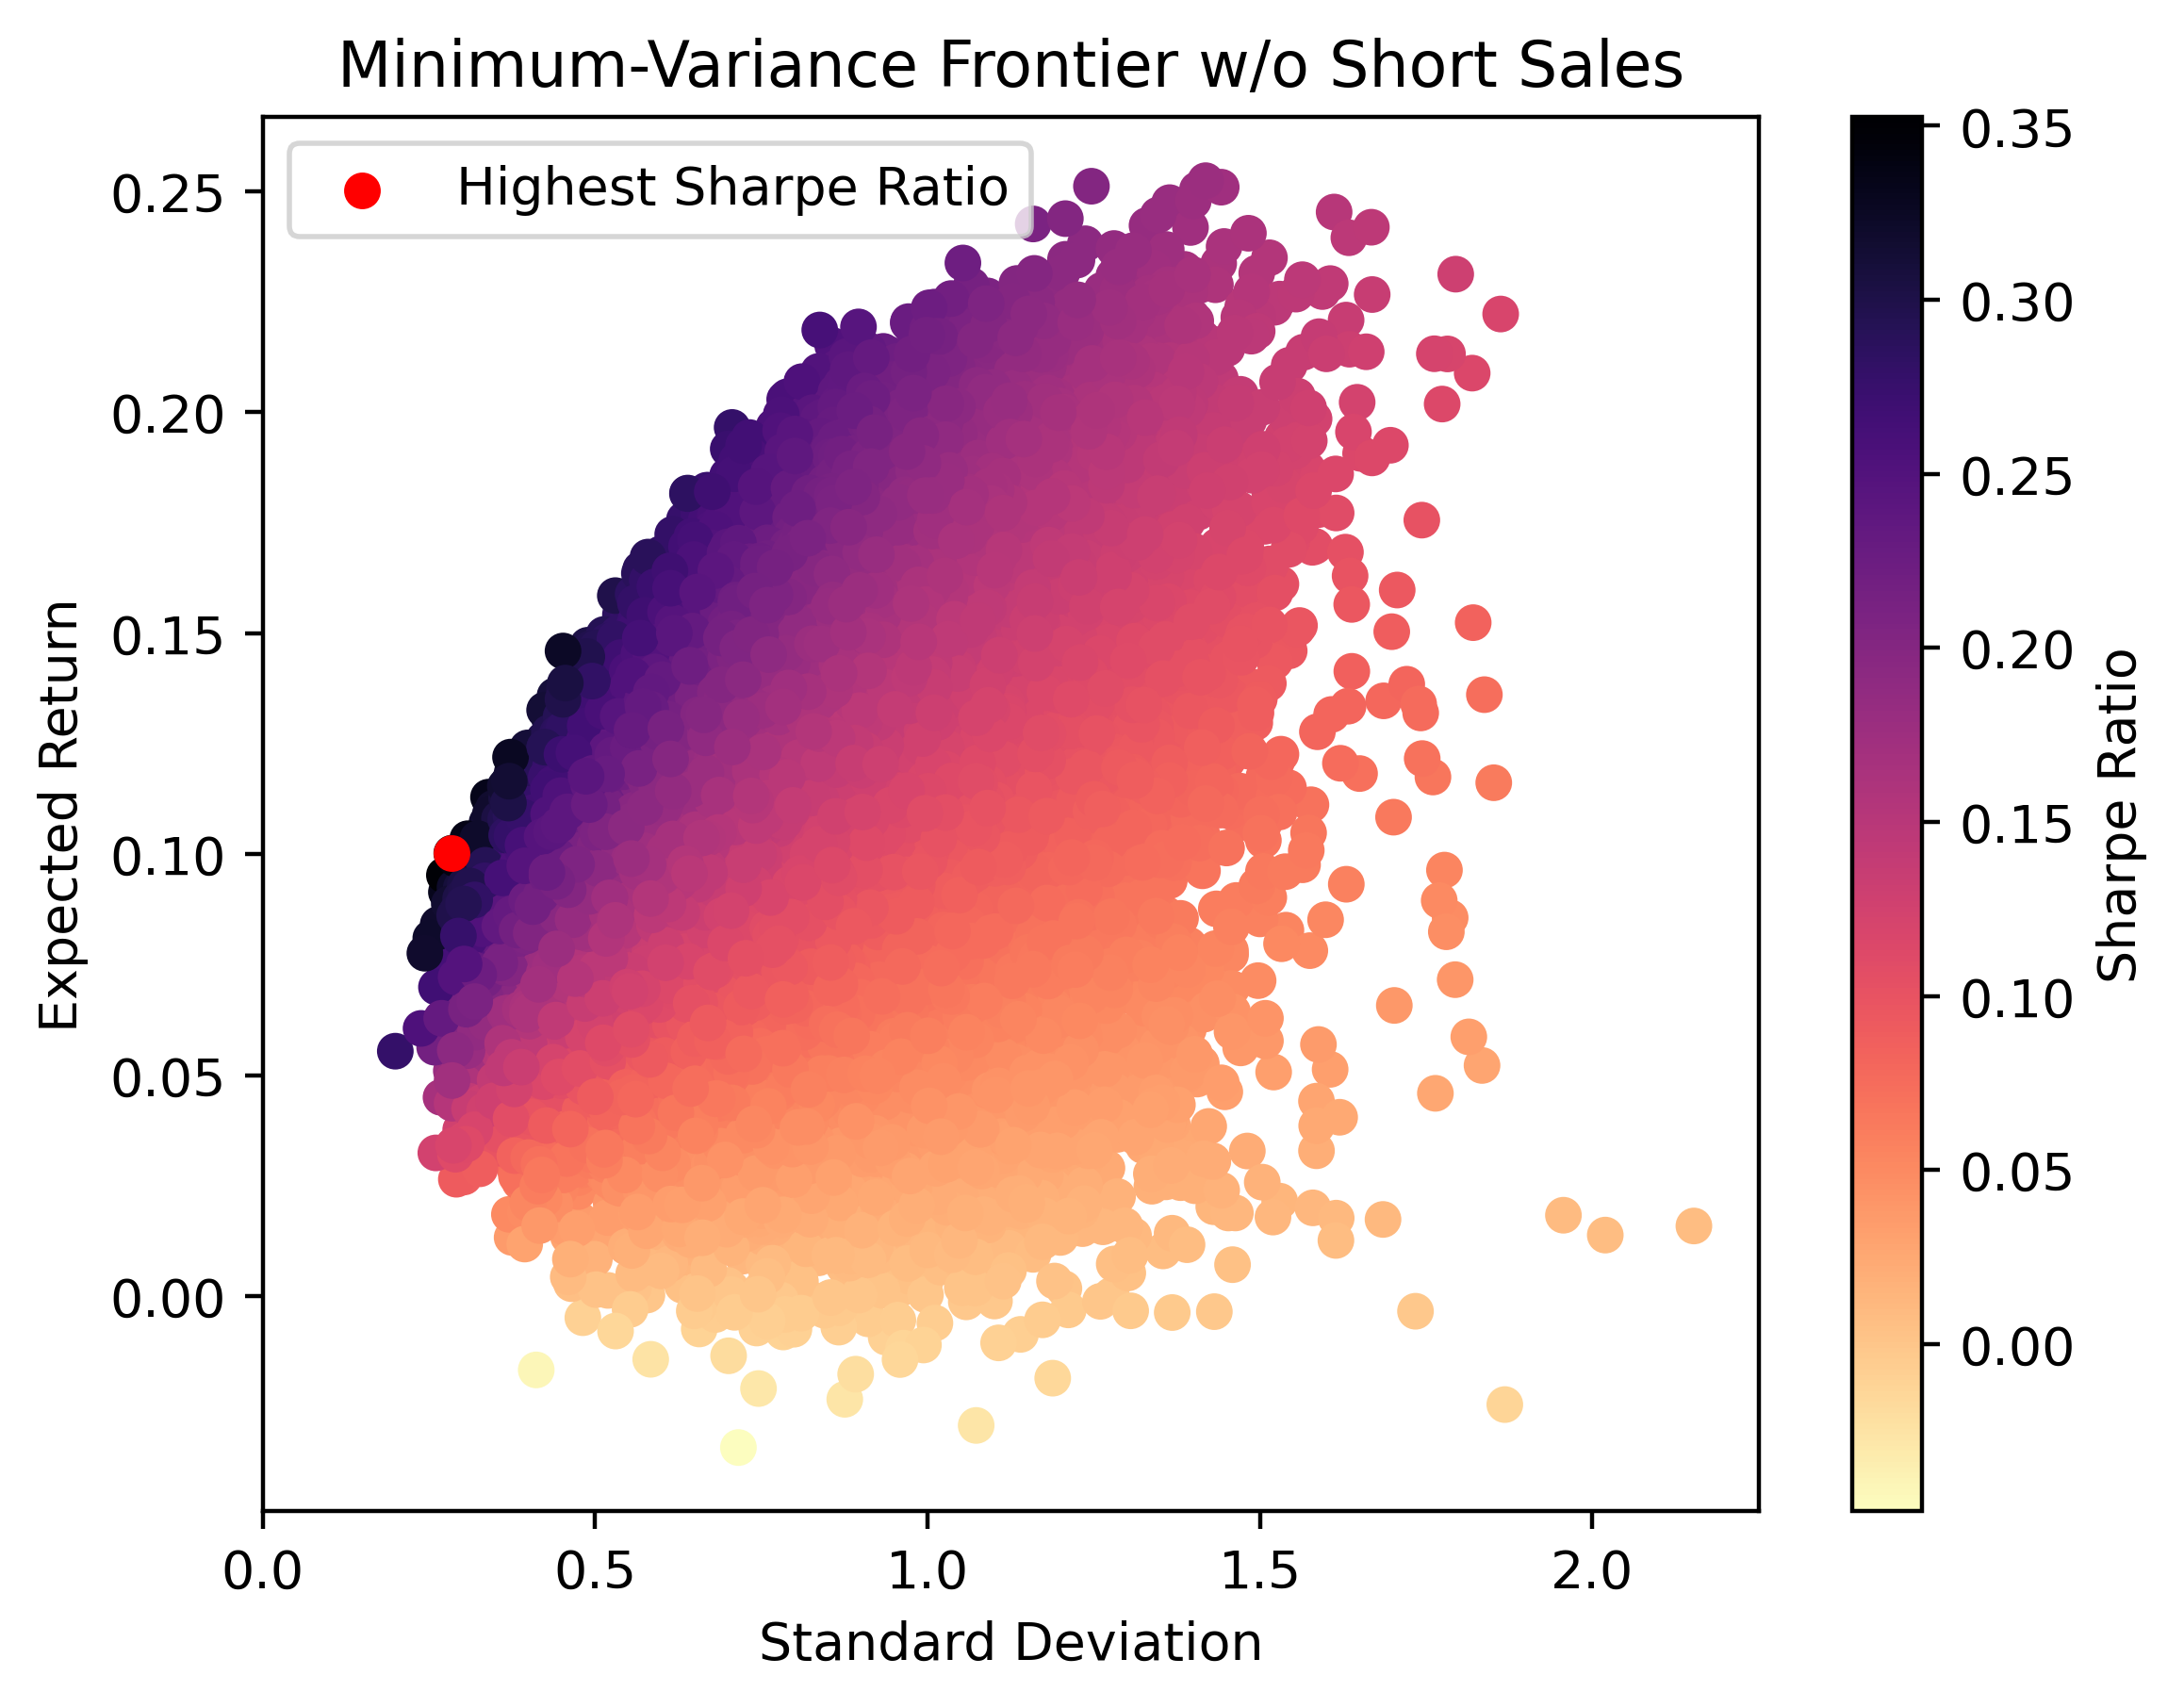

In [84]:
plt.figure(dpi=400)
plt.scatter(std_return1,mean_return1,marker='o',c=np.divide(mean_return1,std_return1),cmap='magma_r')
plt.colorbar(label='Sharpe Ratio')
plt.scatter(std_return1[np.argmax(sharpe_ratio1)],mean_return1[np.argmax(sharpe_ratio1)],marker='o',c='red',label='Highest Sharpe Ratio')

plt.xlabel('Standard Deviation')
plt.ylabel('Expected Return')
plt.title('Minimum-Variance Frontier w/o Short Sales')
plt.legend()
plt.xlim(left = 0)
plt.show()

> Repeat this entire process by simulating 1/w using the standard uniform distribution ⇒ take the reciprocal of the random draw from the standard uniform distribution as the portfolio weight.

In [ ]:
mean_return = []
std_return = []
sharpe_ratio = []
for _ in range(100000):
    W = rng.uniform(low=0,high=1,size=10)
    W = 1/W
    Weights = (W/W.sum()).reshape(10,1)
    mean_return.append((Weights.T @ R)[0,0])
    std_return.append(np.sqrt(Weights.T @ V @ Weights)[0][0])

In [60]:
sharpe_ratio = (np.divide(mean_return,std_return))

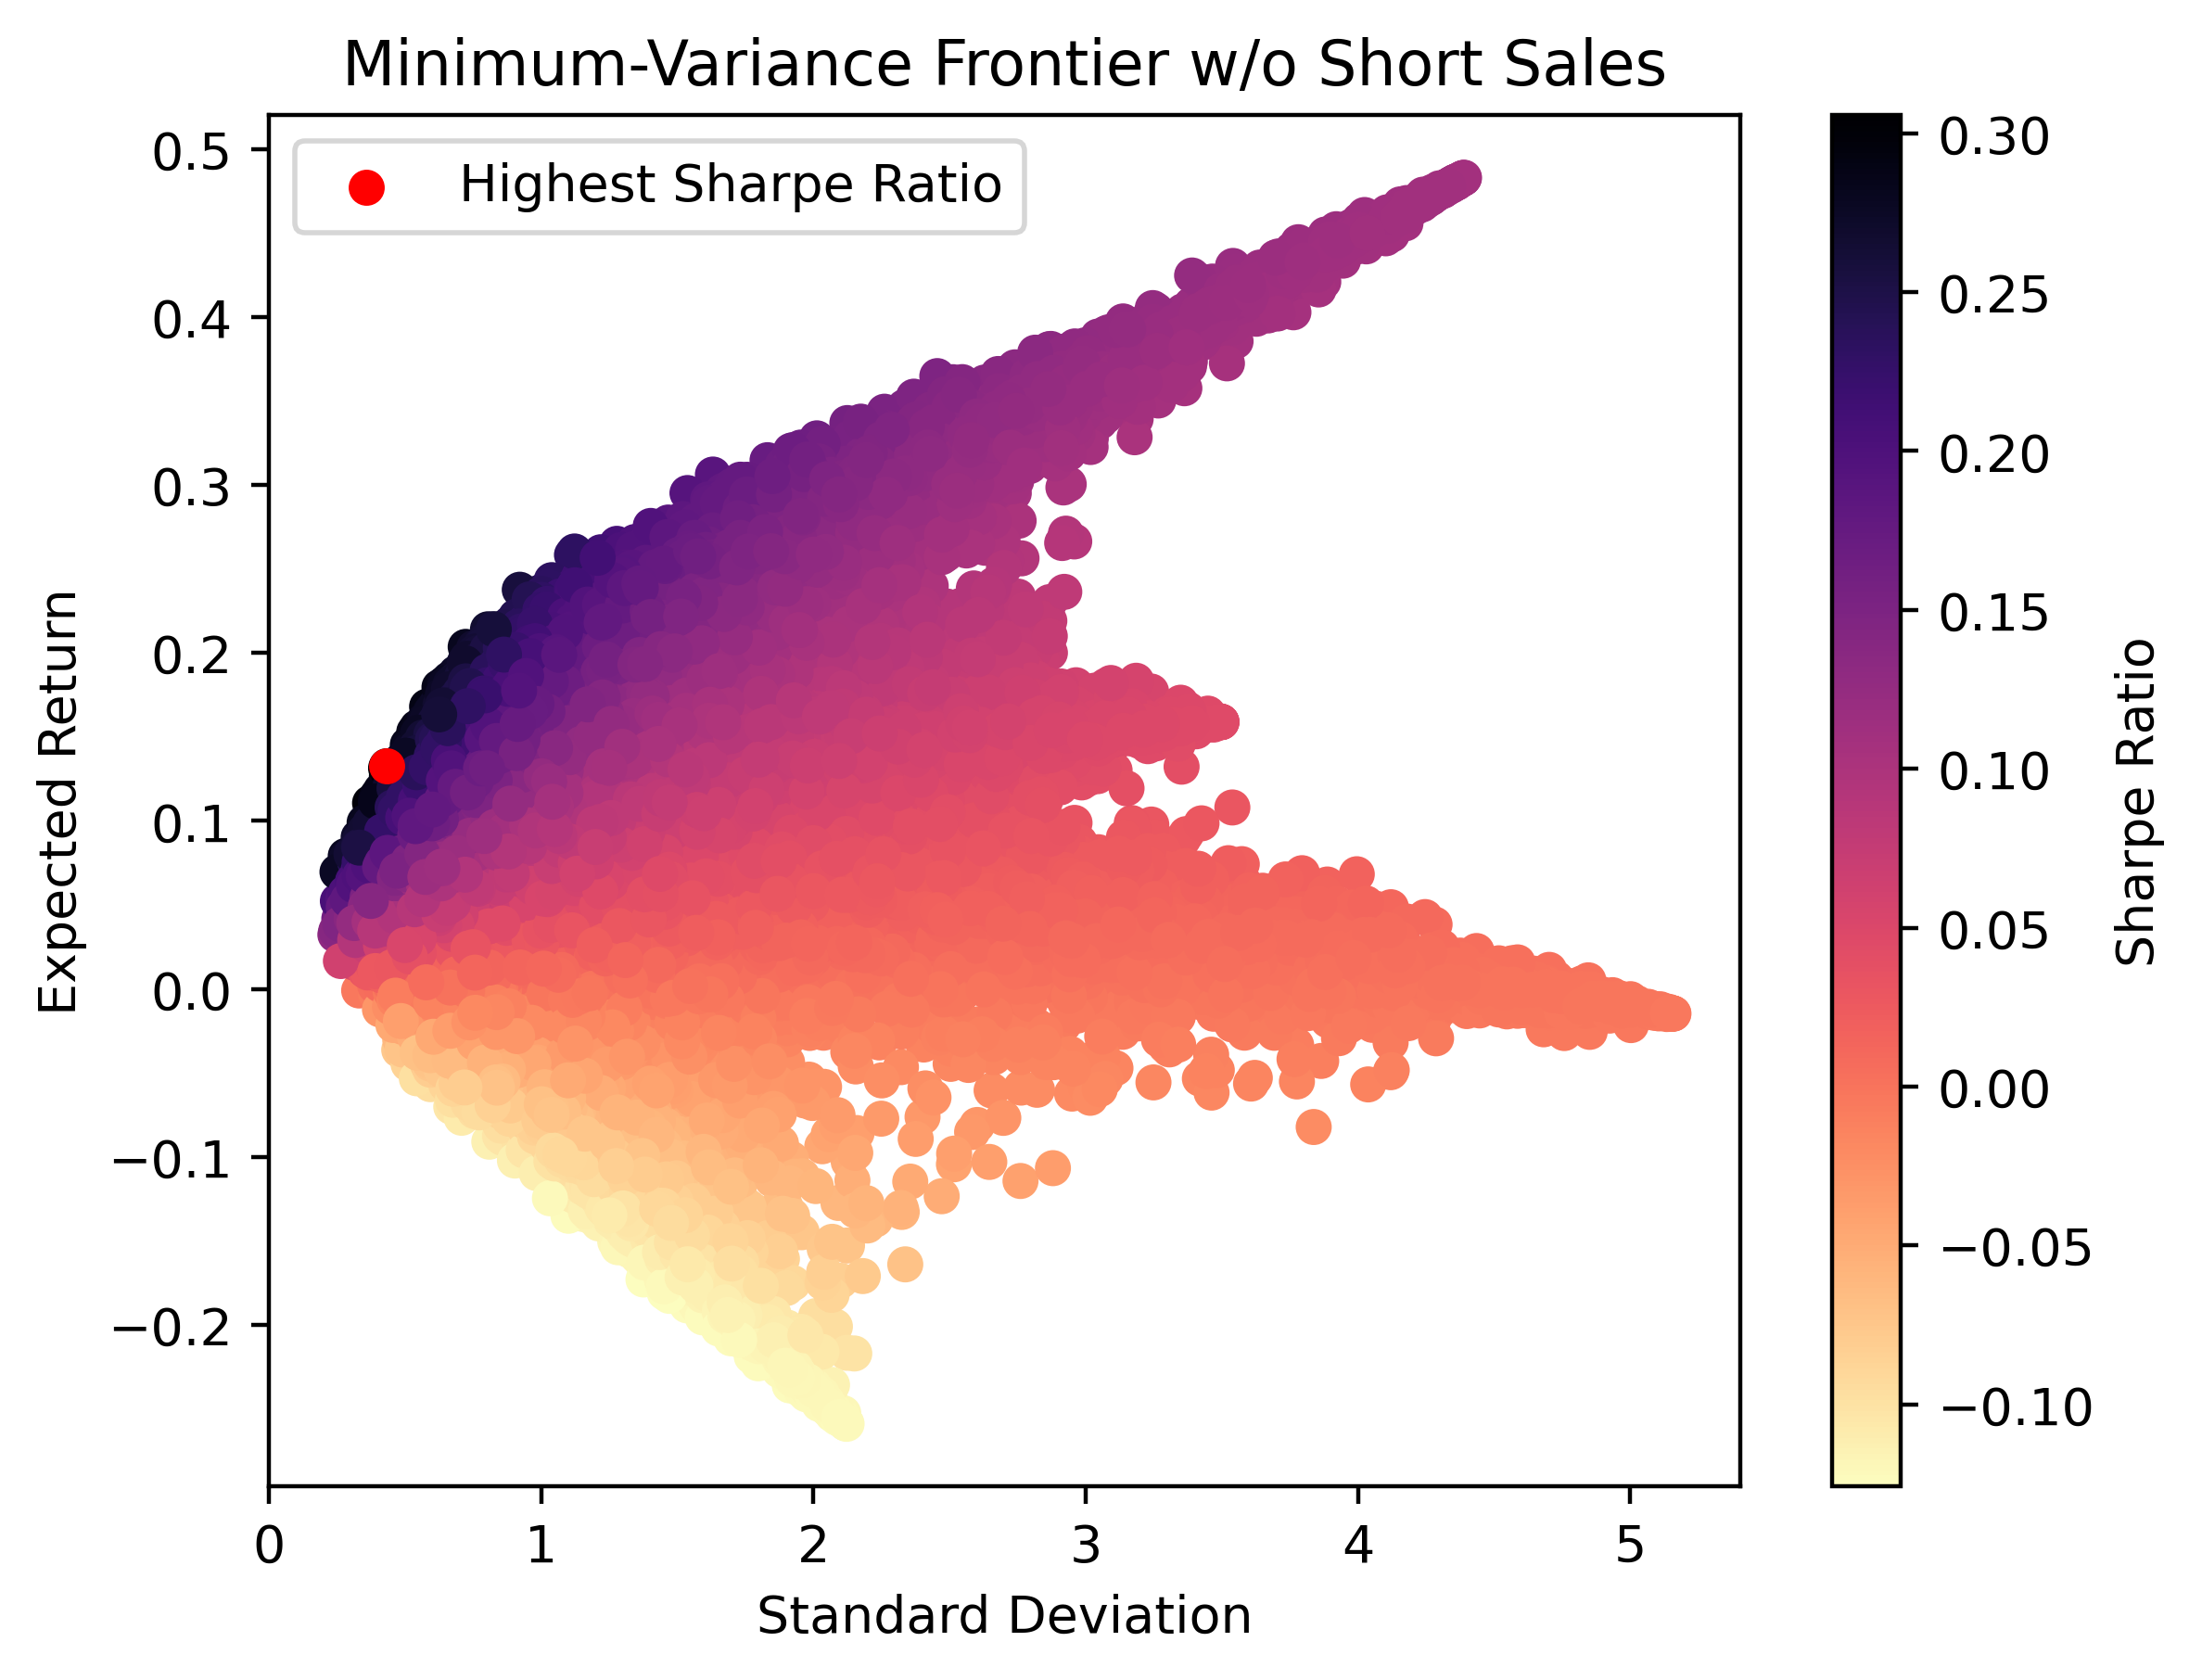

In [86]:
plt.figure(dpi=400)
plt.scatter(std_return,mean_return,marker='o',c=np.divide(mean_return,std_return),cmap='magma_r')
plt.colorbar(label='Sharpe Ratio')
plt.scatter(std_return[np.argmax(sharpe_ratio)],mean_return[np.argmax(sharpe_ratio)],marker='o',c='red',label='Highest Sharpe Ratio')

plt.legend()
plt.xlabel('Standard Deviation')
plt.ylabel('Expected Return')
plt.title('Minimum-Variance Frontier w/o Short Sales')
plt.xlim(left = 0)
plt.show()